https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

https://www.statsmodels.org/dev/regression.html

In [16]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt


In [2]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [11]:
dat.shape

(86, 23)

In [4]:
dat.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


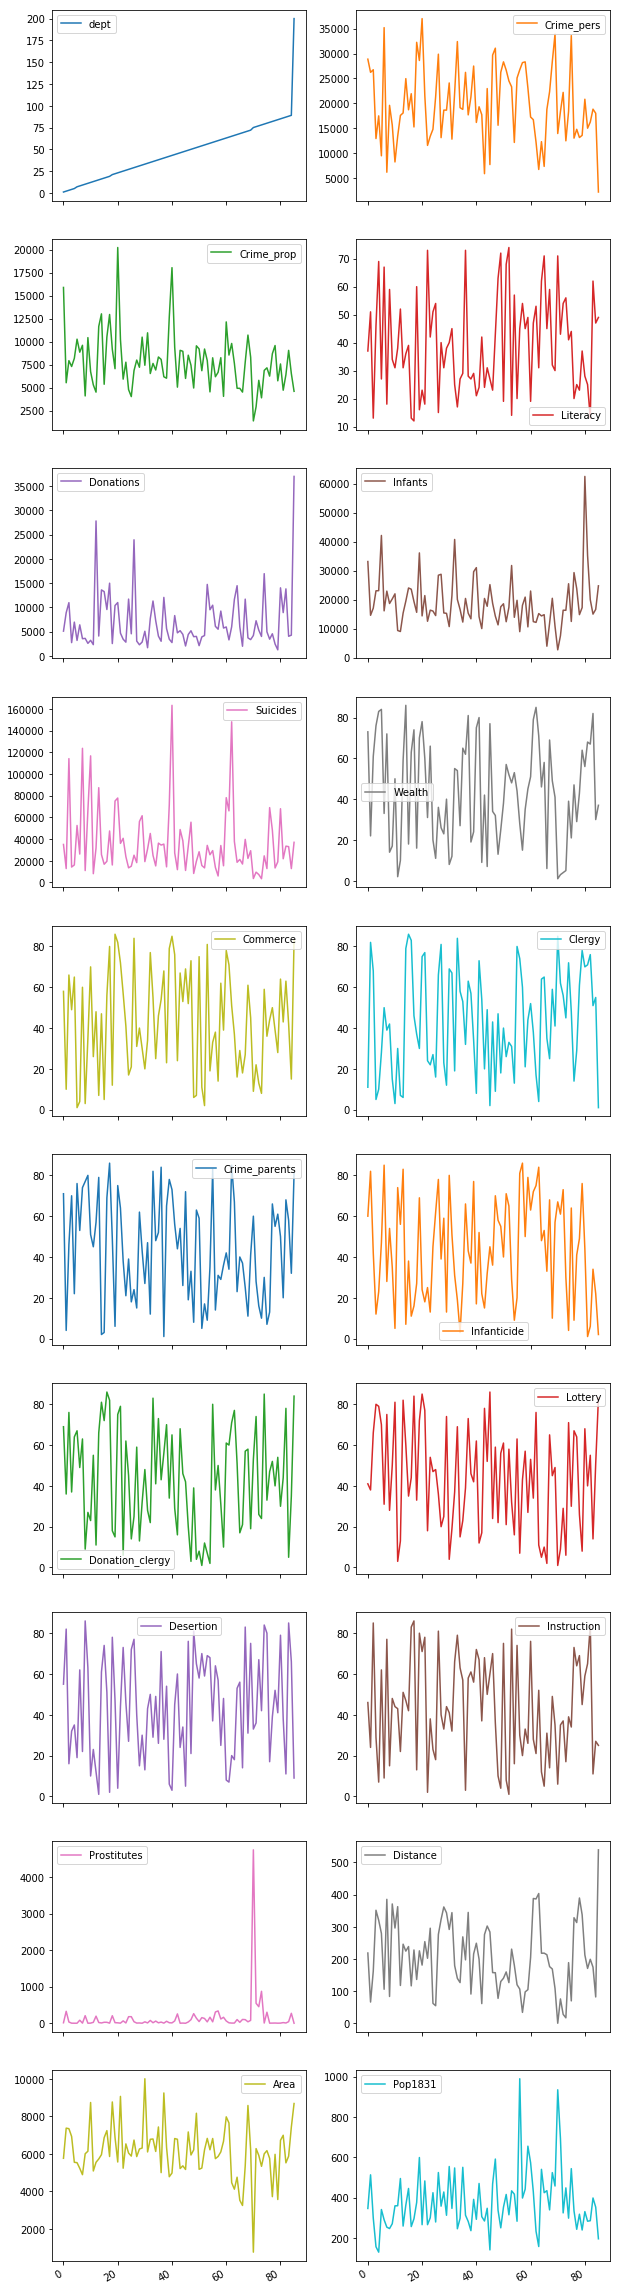

In [17]:
dat.plot(subplots=True,figsize=(10,60), layout =(13,2)  )
plt.show()

In [13]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [30]:
# Inspect the results
resumen = results.summary()
print(resumen)

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           1.90e-08
Time:                        16:34:21   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [40]:
print(results.summary2())

                 Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.333   
Dependent Variable:  Lottery          AIC:                765.6463
Date:                2019-02-26 16:43 BIC:                773.0094
No. Observations:    86               Log-Likelihood:     -379.82 
Df Model:            2                F-statistic:        22.20   
Df Residuals:        83               Prob (F-statistic): 1.90e-08
R-squared:           0.348            Scale:              416.02  
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept       246.4341  35.2325  6.9945 0.0000 176.3581 316.5102
Literacy         -0.4889   0.1276 -3.8320 0.0002  -0.7427  -0.2352
np.log(Pop1831) -31.3114   5.9768 -5.2388 0.0000 -43.1990 -19.4238
------------------------------------------------------------------
Omnibus:     

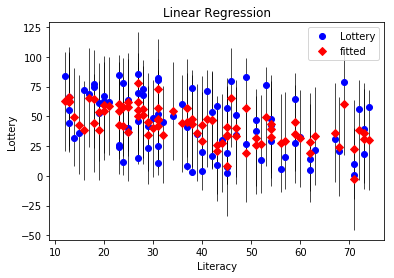

In [23]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, "Literacy", ax=ax)
ax.set_ylabel("Lottery")
ax.set_xlabel("Literacy")
ax.set_title("Linear Regression")

plt.show()

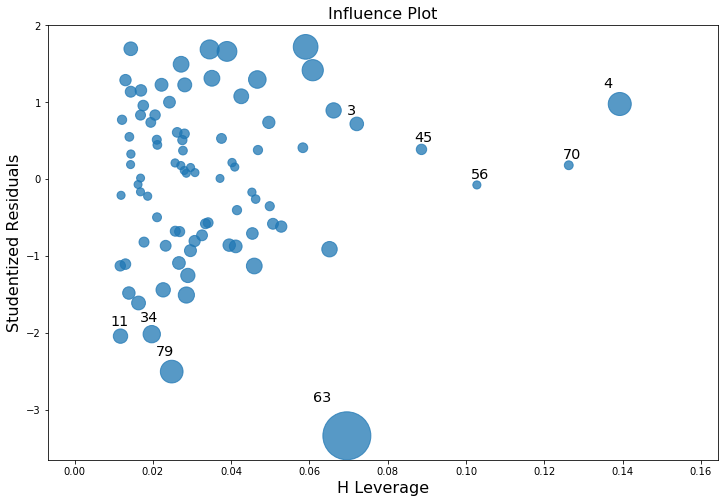

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

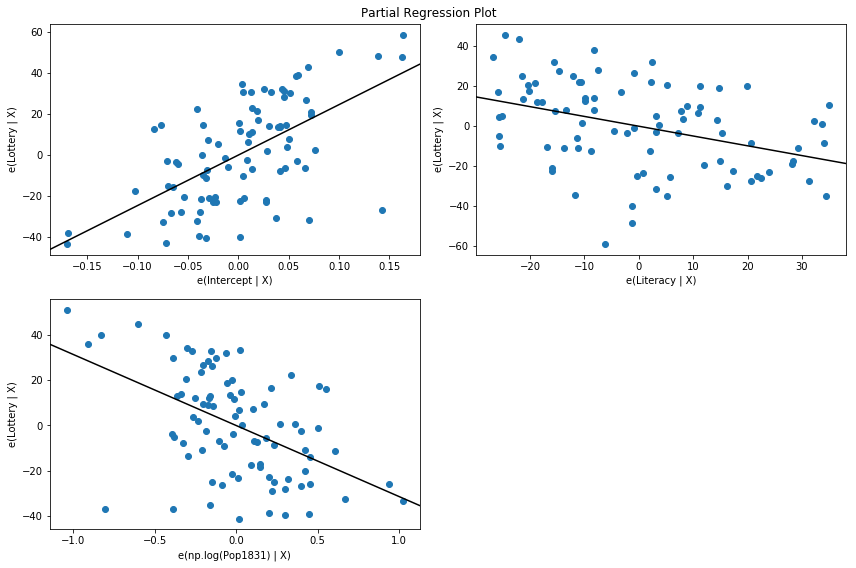

In [25]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

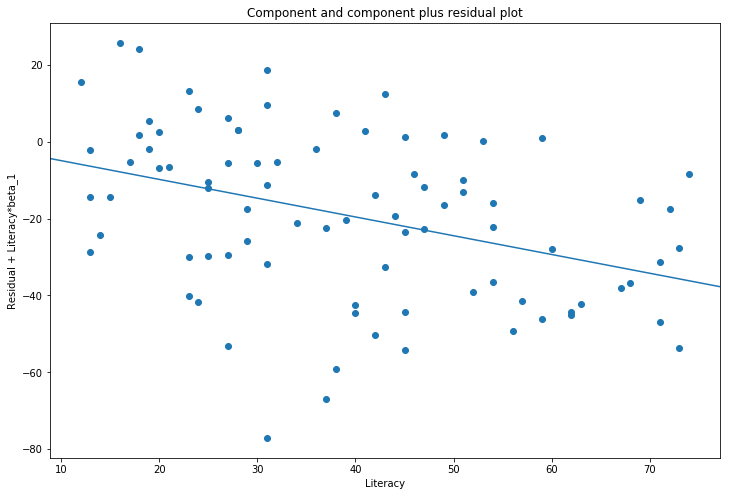

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(results, "Literacy", ax=ax)

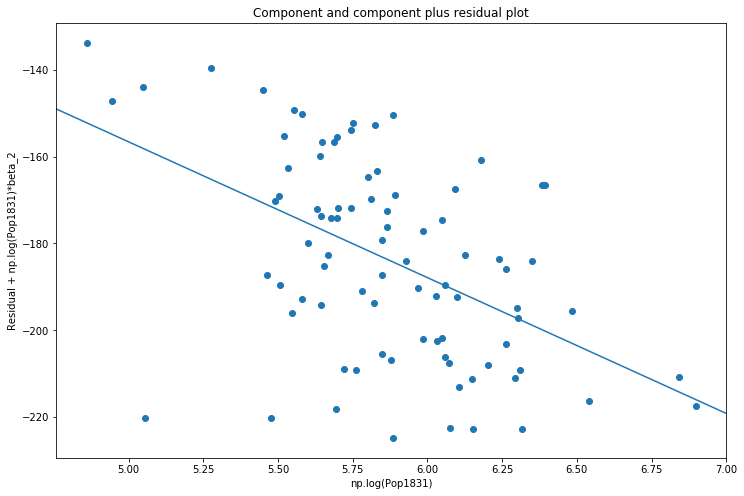

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(results, "np.log(Pop1831)", ax=ax)

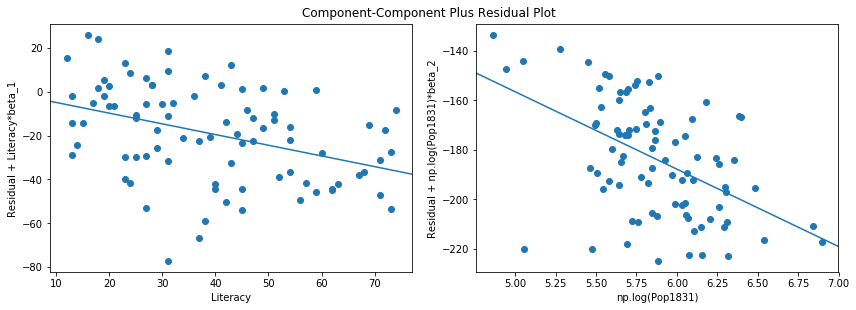

In [29]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(results, fig=fig)

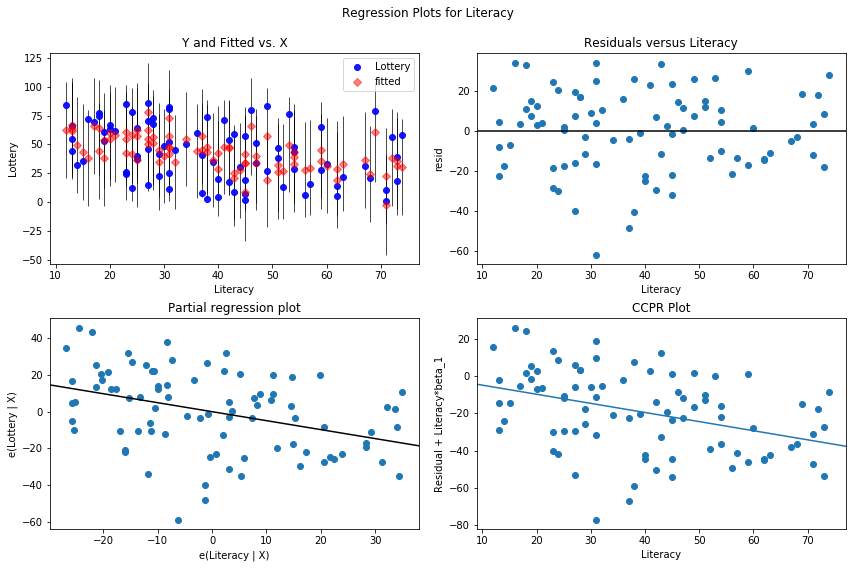

In [33]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "Literacy", fig=fig)

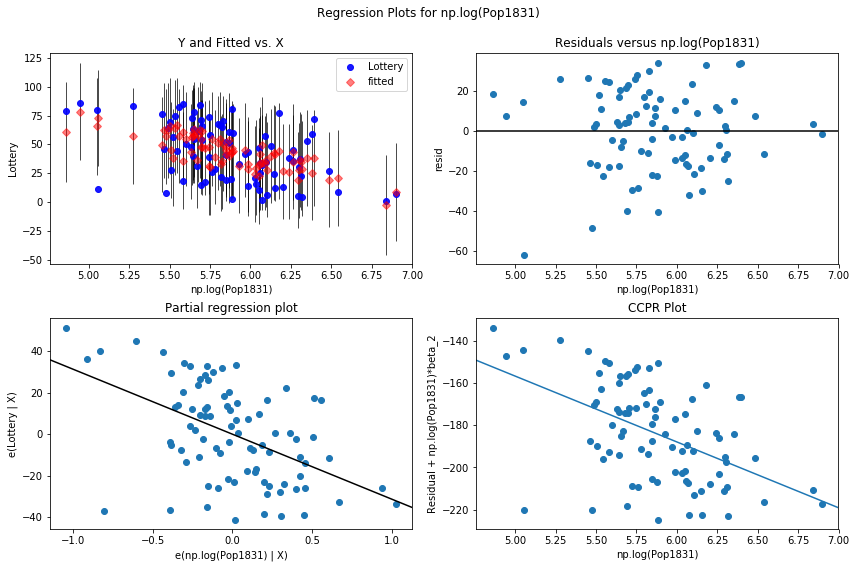

In [34]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "np.log(Pop1831)", fig=fig)

In [36]:
results.params

Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64

In [37]:
type(results.params)

pandas.core.series.Series

In [38]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [41]:
results.predict()

array([45.28111552, 26.10731517, 61.66689491, 65.84571262, 60.50666251,
       50.65364442, 36.18545491, 64.36053682, 45.16226913, 54.50128015,
       47.05726094, 43.59906372, 26.75575698, 57.33509109, 44.31149942,
       36.4093396 , 66.44356669, 62.5179869 , 31.445032  , 38.37361199,
       60.4349197 , 44.14479871, 35.96987559, 47.35193753, 32.05500621,
       43.73139604, 43.02036876, 42.80379617, 41.5681693 , 48.01756606,
       29.0649797 , 41.34530592, 36.80711795, 65.8333425 , 54.95241358,
       34.66823101, 30.8711604 , 56.14387953, 62.18620796, 45.34919918,
       58.41110071, 42.04335068, 46.75969329, 57.84147286, 48.13693343,
       78.42531729, 42.68049242, 25.57205184, 33.38962699, 38.36831808,
       53.49369591, 24.39057162, 30.17352354, 49.46837681, 29.66117011,
       59.94201695,  8.45773319, 32.60937127, 33.71368948, 19.4234143 ,
       38.28350577, 33.70590127, 49.83755855, 72.94944268, 19.11091862,
       22.27579943, 34.24609352, 35.17579164, 34.73435572, 39.96

In [45]:
predicciones = results.get_prediction()

In [46]:
predicciones.predicted_mean

array([45.28111552, 26.10731517, 61.66689491, 65.84571262, 60.50666251,
       50.65364442, 36.18545491, 64.36053682, 45.16226913, 54.50128015,
       47.05726094, 43.59906372, 26.75575698, 57.33509109, 44.31149942,
       36.4093396 , 66.44356669, 62.5179869 , 31.445032  , 38.37361199,
       60.4349197 , 44.14479871, 35.96987559, 47.35193753, 32.05500621,
       43.73139604, 43.02036876, 42.80379617, 41.5681693 , 48.01756606,
       29.0649797 , 41.34530592, 36.80711795, 65.8333425 , 54.95241358,
       34.66823101, 30.8711604 , 56.14387953, 62.18620796, 45.34919918,
       58.41110071, 42.04335068, 46.75969329, 57.84147286, 48.13693343,
       78.42531729, 42.68049242, 25.57205184, 33.38962699, 38.36831808,
       53.49369591, 24.39057162, 30.17352354, 49.46837681, 29.66117011,
       59.94201695,  8.45773319, 32.60937127, 33.71368948, 19.4234143 ,
       38.28350577, 33.70590127, 49.83755855, 72.94944268, 19.11091862,
       22.27579943, 34.24609352, 35.17579164, 34.73435572, 39.96

In [47]:
predicciones.se_mean

array([2.22104481, 3.41668317, 4.09044634, 5.47587961, 7.61176144,
       2.700892  , 4.38642829, 3.95071926, 4.05314593, 2.78612643,
       2.44245149, 2.20780882, 3.34084445, 3.03900747, 2.24471451,
       2.5962205 , 4.36957732, 4.20819358, 3.44571573, 4.95497124,
       3.42099754, 4.02386176, 5.20466732, 2.44535478, 2.84501233,
       3.2676594 , 4.55390737, 2.20222805, 2.71524259, 2.32499015,
       3.46893468, 2.32375722, 3.9309393 , 4.1253366 , 2.86276157,
       3.72867531, 4.92520206, 2.92391789, 3.57078549, 2.64552456,
       3.35928291, 3.4460005 , 2.40087079, 3.1748848 , 2.43869502,
       6.07164247, 3.50845556, 3.78824405, 3.76686329, 5.24650634,
       3.39295253, 4.34073722, 5.03055571, 4.13782842, 3.27058814,
       3.51026211, 6.53850922, 2.95456817, 2.6541871 , 4.41415058,
       4.54316128, 2.64729643, 3.8196747 , 5.37904149, 4.34639139,
       4.6858752 , 2.60619337, 3.36389974, 3.38382118, 2.96485557,
       7.24696129, 4.59129939, 2.95915225, 3.32955927, 2.44193

In [48]:
predicciones.se_obs

array([20.51707226, 20.68068998, 20.8026192 , 21.1187706 , 21.77053344,
       20.57454816, 20.86283699, 20.77559619, 20.79531693, 20.58591059,
       20.54221954, 20.51564364, 20.66829591, 20.62165805, 20.51964808,
       20.56106941, 20.85930057, 20.82609199, 20.6855063 , 20.9897345 ,
       20.6814032 , 20.78962909, 21.05007782, 20.54256494, 20.59396293,
       20.65659246, 20.89869103, 20.51504381, 20.57643693, 20.52858479,
       20.6893867 , 20.52844519, 20.77184388, 20.80950783, 20.59642246,
       20.73451793, 20.98272693, 20.60501177, 20.7067072 , 20.56735312,
       20.67128433, 20.68555374, 20.53731713, 20.64211975, 20.54177323,
       21.28102574, 20.69604974, 20.7453129 , 20.74141927, 21.06046161,
       20.67678266, 20.85327825, 21.00770585, 20.81198785, 20.65705596,
       20.69635606, 21.41890093, 20.60938348, 20.56846916, 20.86868323,
       20.89635204, 20.56758111, 20.75107537, 21.09386881, 20.85445594,
       20.92784367, 20.56233105, 20.67203511, 20.67528621, 20.61

In [54]:
predicciones.summary_frame(alpha=0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,45.281116,2.221045,41.586585,48.975646,11.152604,79.409627
1,26.107315,3.416683,20.423935,31.790695,-8.293362,60.507992
2,61.666895,4.090446,54.862764,68.471026,27.063398,96.270391
3,65.845713,5.475880,56.737024,74.954401,30.716324,100.975102
4,60.506663,7.611761,47.845105,73.168220,24.293118,96.720207
5,50.653644,2.700892,46.160926,55.146363,16.429526,84.877763
6,36.185455,4.386428,28.888982,43.481928,1.481791,70.889119
7,64.360537,3.950719,57.788831,70.932243,29.801991,98.919083
8,45.162269,4.053146,38.420184,51.904354,10.570919,79.753619
9,54.501280,2.786126,49.866781,59.135779,20.258261,88.744299


In [56]:
predicciones.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,45.281116,2.221045,40.863547,49.698684,4.473484,86.088747
1,26.107315,3.416683,19.311670,32.902961,-15.025745,67.240376
2,61.666895,4.090446,53.531162,69.802628,20.291322,103.042468
3,65.845713,5.475880,54.954408,76.737017,23.841327,107.850098
4,60.506663,7.611761,45.367175,75.646150,17.205947,103.807378
5,50.653644,2.700892,45.281679,56.025610,9.731696,91.575593
6,36.185455,4.386428,27.461025,44.909884,-5.309889,77.680799
7,64.360537,3.950719,56.502715,72.218359,23.038712,105.682362
8,45.162269,4.053146,37.100725,53.223813,3.801220,86.523318
9,54.501280,2.786126,48.959787,60.042774,13.556732,95.445828


In [59]:
predicciones.summary_frame(alpha=0.01)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,45.281116,2.221045,39.425622,51.136609,-8.809453,99.371684
1,26.107315,3.416683,17.099678,35.114952,-28.414610,80.629240
2,61.666895,4.090446,50.882970,72.450820,6.823520,116.510270
3,65.845713,5.475880,51.409275,80.282151,10.168846,121.522580
4,60.506663,7.611761,40.439252,80.574073,3.111508,117.901817
5,50.653644,2.700892,43.533097,57.774192,-3.588451,104.895740
6,36.185455,4.386428,24.621212,47.749697,-18.816677,91.187586
7,64.360537,3.950719,53.944984,74.776090,9.588404,119.132669
8,45.162269,4.053146,34.476682,55.847856,-9.661855,99.986393
9,54.501280,2.786126,47.156023,61.846537,0.229229,108.773332


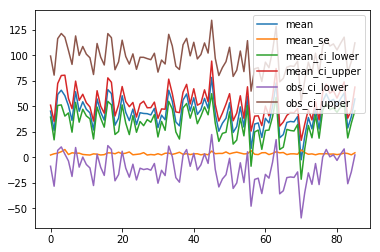

In [60]:
predicciones.summary_frame(alpha=0.01).plot()

In [61]:
dir(predicciones)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conf_int',
 'df',
 'dist',
 'dist_args',
 'predicted_mean',
 'row_labels',
 'se_mean',
 'se_obs',
 'summary_frame',
 'table',
 'var_pred_mean',
 'var_resid']